In [1]:
using Pkg, Revise
Pkg.activate("..")
using GenLinAlgProblems, LinearAlgebra, RowEchelon, Latexify, LaTeXStrings, SymPy, Random

using PyCall
itikz = pyimport("itikz")
nM    = pyimport("itikz.nicematrix")

Random.seed!(113312);

  Activating project at `C:\Users\jeff\NOTEBOOKS\elementary-linear-algebra\GenLinAlgProblems`
[ Info: Precompiling GenLinAlgProblems [3c0f76d2-298f-40a4-82ea-fb4356fbbd2d] (cache misses: include_dependency fsize change (4), wrong dep version loaded (2), incompatible header (6))


# 0. Markdown

<details open>
  <summary>Collapsable Markdown, open by default</summary>

  ### Heading
  1. Foo
  2. Bar
     * Baz
     * Qux

  ### Some Javascript
  ```js
  function logSomething(something) {
    console.log('Something', something);
  }
  ```

  <summary><i>Wow, so fancy</i></summary>
  <b>WOW, SO BOLD</b>

</details>

# 1. NumPy, Latex Representations and Rounding

In [2]:
println("L string: Combine text and latex expressions")
A = [1 -2; 3 122]
L"\;\;\text{We define the matrix } A = %$(latexify(A, adjustment=:r, transpose=true, arraystyle=:round))"

L string: Combine text and latex expressions


L"$\;\;\text{We define the matrix } A = \begin{equation}
\left(
\begin{array}{rr}
1 & 3 \\
-2 & 122 \\
\end{array}
\right)
\end{equation}
$"

In [3]:
println("HTML: Wrap the text in a div")

A=[1 -2; 3 122]
latex_string = L"\;\;\text{We define the matrix } \quad A = %$(latexify(A))"
html_string  = """<div style="text-align: left;padding-left:1cm;">$latex_string</div>"""

# Display the HTML string
display("text/html", html_string)

HTML: Wrap the text in a div


$\;\;\text{We define the matrix } \quad A = \begin{equation}
\left[
\begin{array}{cc}
1 & -2 \\
3 & 122 \\
\end{array}
\right]
\end{equation}
$

In [4]:
A=[1 -2; 3 122]
L1 = L"\;\;\text{We define the matrix }\;\; A = %$(latexify(A))"
L2 = L"B = \begin{pmatrix} 5 & 6 \\ 7 & 8 \end{pmatrix}"
sep = L"\quad \text{and} \;\;"
display(L"L string: Concatenation test: %$(L1), %$(sep)  %$(L2)")

L"L string: Concatenation test: $\;\;\text{We define the matrix }\;\; A = \begin{equation}
\left[
\begin{array}{cc}
1 & -2 \\
3 & 122 \\
\end{array}
\right]
\end{equation}
$, $\quad \text{and} \;\;$  $B = \begin{pmatrix} 5 & 6 \\ 7 & 8 \end{pmatrix}$"

In [5]:
# Print out a definition of an integer array for use with numpy
A = [ 1 2 1; -1 1 2]
print_np_array_def(A)

"A = np.array([\n[1, 2, 1],\n[-1, 1, 2]\n])"

In [6]:
matrices=[[ [1 2; 2 1], :none], [:none]]
latexify( apply_function( x -> x^2, matrices) )

L"$\left[
\begin{array}{c}
\left[
\begin{array}{c}
\left[
\begin{array}{cc}
1 & 4 \\
4 & 1 \\
\end{array}
\right] \\
none \\
\end{array}
\right] \\
\left[
\begin{array}{c}
none \\
\end{array}
\right] \\
\end{array}
\right]$"

In [7]:
matrices = [ [[1 2; 2 1], [1//1 2; (-3)//5 -1]], [["alpha" "b"], [1.1 π] ] ]
println( apply_function( x->to_latex(x), matrices ))

[[["1" "2"; "2" "1"], ["1" "2"; "-\\frac{3}{5}" "-1"]], [["\\text{alpha}" "\\text{b}"], ["1.1" "3.141592653589793"]]]


In [8]:
to_latex( -1//2), to_latex(2+1//2im)

("-\\frac{1}{2}", "2-\\frac{1}{2}\\mathit{i}")

In [9]:
factor_out_denominator( [1//2 1//3; 2//1 1//(-3) ])

(6, [3 2; 12 -2])

In [10]:
round_value( 2.3, 0), round_value(1//3, 3), round_value( Complex(1//3, -1//5),0), round_value( Complex(1//3, -1//5), 1), round_value( Complex(0, -1//5), 1)

(2, 0.333, 0 + 0im, 0.3 - 0.2im, 0.0 - 0.2im)

In [11]:
res = round_value( Complex(0,-1//5), 1)
to_latex(res)

"-0.2\\mathit{i}"

In [12]:
matrices = [ [[1 2; 2 1], [1//1 2; (-3)//5 -1]] ]
stack = apply_function( x->Complex(x+1//3, 1//5), matrices)
latexify( round_matrices(stack,1) )

L"\begin{equation}
\left[
\begin{array}{c}
\left[
\begin{array}{c}
\left[
\begin{array}{cc}
1.3+0.2\mathit{i} & 2.3+0.2\mathit{i} \\
2.3+0.2\mathit{i} & 1.3+0.2\mathit{i} \\
\end{array}
\right] \\
\left[
\begin{array}{cc}
1.3+0.2\mathit{i} & 2.3+0.2\mathit{i} \\
-0.3+0.2\mathit{i} & -0.7+0.2\mathit{i} \\
\end{array}
\right] \\
\end{array}
\right] \\
\end{array}
\right]
\end{equation}
"

In [13]:
m=latexify(stack[1][1])
println(m)
m

\begin{equation}
\left[
\begin{array}{cc}
\frac{4}{3}+\frac{1}{5}\mathit{i} & \frac{7}{3}+\frac{1}{5}\mathit{i} \\
\frac{7}{3}+\frac{1}{5}\mathit{i} & \frac{4}{3}+\frac{1}{5}\mathit{i} \\
\end{array}
\right]
\end{equation}



L"\begin{equation}
\left[
\begin{array}{cc}
\frac{4}{3}+\frac{1}{5}\mathit{i} & \frac{7}{3}+\frac{1}{5}\mathit{i} \\
\frac{7}{3}+\frac{1}{5}\mathit{i} & \frac{4}{3}+\frac{1}{5}\mathit{i} \\
\end{array}
\right]
\end{equation}
"

In [14]:
display(l_show(m))
l_show(set( matrices[1]...,stack[1]..., arraystyle=:parray, separator=L"\quad "))

L"$\begin{equation}
\left[
\begin{array}{cc}
\frac{4}{3}+\frac{1}{5}\mathit{i} & \frac{7}{3}+\frac{1}{5}\mathit{i} \\
\frac{7}{3}+\frac{1}{5}\mathit{i} & \frac{4}{3}+\frac{1}{5}\mathit{i} \\
\end{array}
\right]
\end{equation}$
"

L"$\left\{ \left(\begin{array}{rr}
1 & 2 \\
2 & 1 \\
\end{array}\right) \quad  \frac{1}{5} \left(\begin{array}{rr}
5 & 10 \\
-3 & -5 \\
\end{array}\right) \quad  \frac{1}{15} \left(\begin{array}{rr}
20+3\mathit{i} & 35+3\mathit{i} \\
35+3\mathit{i} & 20+3\mathit{i} \\
\end{array}\right) \quad  \frac{1}{15} \left(\begin{array}{rr}
20+3\mathit{i} & 35+3\mathit{i} \\
-4+3\mathit{i} & -10+3\mathit{i} \\
\end{array}\right) \right\}$
"

# 2. GE, GJ Type Problems

## 2.1. Generate Different Types of Matrices

In [15]:
# unit lower triangular matrix
Random.seed!(3)
l_show( L"\;\;\text{unit lower triangular matrix: \quad }", unit_lower(3,4; maxint=4) )

L"$\;\;\text{unit lower triangular matrix: \quad } \left(\begin{array}{rrrr}
1 & 0 & 0 & 0 \\
-1 & 1 & 0 & 0 \\
4 & 4 & 1 & 0 \\
\end{array}\right)$
"

In [16]:
# lower triangilar matrix
Random.seed!(23)
l_show( L"\text{lower triangular matrix} \qquad ", lower(3))

L"$\text{lower triangular matrix} \qquad  \left(\begin{array}{rrr}
-3 & 0 & 0 \\
1 & 1 & 0 \\
1 & 2 & 3 \\
\end{array}\right)$
"

In [17]:
# reduced row echelon form matrix of given rank, with and without zero values to the right of pivots
Random.seed!(13221)
mat,pivot_cols = rref_matrix(4,10,3; maxint=5, pivot_in_first_col=false, has_zeros=false)
println("pivot cols: $pivot_cols")
l_show( L"\text{RREF} \qquad ", mat )

pivot cols: [2, 6, 9]


L"$\text{RREF} \qquad  \left(\begin{array}{rrrrrrrrrr}
0 & 1 & -5 & -2 & 5 & 0 & -4 & -5 & 0 & -2 \\
0 & 0 & 0 & 0 & 0 & 1 & -3 & -5 & 0 & 4 \\
0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 1 & 3 \\
0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 \\
\end{array}\right)$
"

In [18]:
Random.seed!(1212)
l_show( L"\text{Symmetric matrix: }\qquad ", symmetric_matrix(4;maxint=9, with_zeros=true))

L"$\text{Symmetric matrix: }\qquad  \left(\begin{array}{rrrr}
7 & -1 & -2 & 7 \\
-1 & -4 & -4 & -4 \\
-2 & -4 & -7 & 0 \\
7 & -4 & 0 & -5 \\
\end{array}\right)$
"

In [19]:
Random.seed!(1212)
#L"\text{Skew symmetric matrix: } \qquad %$(latexify(skew_symmetric_matrix(4;maxint=9, with_zeros=true), adjustment=:r))"
l_show("Skew symmetric matrix: \\quad", skew_symmetric_matrix(4;maxint=9, with_zeros=true))

L"$\text{Skew symmetric matrix: \quad} \left(\begin{array}{rrrr}
0 & 1 & 2 & -7 \\
-1 & 0 & 4 & 4 \\
-2 & -4 & 0 & 0 \\
7 & -4 & 0 & 0 \\
\end{array}\right)$
"

In [20]:
Random.seed!(44372)
L"\text{Elimination Matrix:} \qquad %$(latexify(i_with_onecol(6, 2; maxint=9, with_zeros=true ), adjustment=:r))"

L"$\text{Elimination Matrix:} \qquad \begin{equation}
\left[
\begin{array}{rrrrrr}
1 & 0 & 0 & 0 & 0 & 0 \\
0 & 1 & 0 & 0 & 0 & 0 \\
0 & -9 & 1 & 0 & 0 & 0 \\
0 & 0 & 0 & 1 & 0 & 0 \\
0 & 2 & 0 & 0 & 1 & 0 \\
0 & -3 & 0 & 0 & 0 & 1 \\
\end{array}
\right]
\end{equation}
$"

In [21]:
Random.seed!(44372)
L"\text{Elimination Matrix, no zeros:}\qquad %$(latexify(i_with_onecol(6, 3; maxint=9, with_zeros=false,upper=false ), adjustment=:r))"

L"$\text{Elimination Matrix, no zeros:}\qquad \begin{equation}
\left[
\begin{array}{rrrrrr}
1 & 0 & 0 & 0 & 0 & 0 \\
0 & 1 & 0 & 0 & 0 & 0 \\
0 & 0 & 1 & 0 & 0 & 0 \\
0 & 0 & -9 & 1 & 0 & 0 \\
0 & 0 & -1 & 0 & 1 & 0 \\
0 & 0 & 2 & 0 & 0 & 1 \\
\end{array}
\right]
\end{equation}
$"

In [22]:
Random.seed!(44372)
L"\text{Elimination Matrix, upper:}\qquad %$(latexify(i_with_onecol(6, 4; maxint=9, with_zeros=false,lower=false ), adjustment=:r))"

L"$\text{Elimination Matrix, upper:}\qquad \begin{equation}
\left[
\begin{array}{rrrrrr}
1 & 0 & 0 & -9 & 0 & 0 \\
0 & 1 & 0 & -1 & 0 & 0 \\
0 & 0 & 1 & 2 & 0 & 0 \\
0 & 0 & 0 & 1 & 0 & 0 \\
0 & 0 & 0 & 0 & 1 & 0 \\
0 & 0 & 0 & 0 & 0 & 1 \\
\end{array}
\right]
\end{equation}
$"

## 2.2 Generating GE and GJ Type Problems

In [23]:
Random.seed!(416)
pivot_cols,A = gen_gj_matrix(5,4,2;maxint=2,pivot_in_first_col=true, has_zeros=true)
lp=L"\text{pivot columns: } %$(latexify( pivot_cols)')"
la=L"\quad A=%$(latexify(A, adjustment=:r))"
L"%$(lp), %$(la)" 

L"$\text{pivot columns: } \begin{equation}
\left[
\begin{array}{c}
1 \\
3 \\
\end{array}
\right]
\end{equation}
$, $\quad A=\begin{equation}
\left[
\begin{array}{rrrr}
2 & 2 & 4 & -3 \\
-2 & -2 & -6 & 4 \\
-4 & -4 & -4 & 4 \\
0 & 0 & 2 & -1 \\
4 & 4 & 10 & -7 \\
\end{array}
\right]
\end{equation}
$"

In [24]:
X,B=gen_rhs(A,pivot_cols; maxint=2,num_rhs=2,has_zeros=false)
latexify( [A', X', latex(" = "), B']')

L"\begin{equation}
\left[
\begin{array}{cccc}
\left[
\begin{array}{cccc}
2 & 2 & 4 & -3 \\
-2 & -2 & -6 & 4 \\
-4 & -4 & -4 & 4 \\
0 & 0 & 2 & -1 \\
4 & 4 & 10 & -7 \\
\end{array}
\right] & \left[
\begin{array}{cc}
2 & -2 \\
0 & 0 \\
-1 & 2 \\
0 & 0 \\
\end{array}
\right] &  =  & \left[
\begin{array}{cc}
0 & 4 \\
2 & -8 \\
-4 & 0 \\
-2 & 4 \\
-2 & 12 \\
\end{array}
\right] \\
\end{array}
\right]
\end{equation}
"

In [25]:
Random.seed!(41283)
A,X,B=gen_gj_pb(3,6,2; maxint=2, pivot_in_first_col=false, num_rhs=2,has_zeros=false)
latexify( [ [A B]', X']')

L"$\left[
\begin{array}{cc}
\left[
\begin{array}{cccccccc}
0 & 1 & -2 & 2 & 3 & 1 & 3 & 0 \\
0 & -2 & 3 & -2 & -5 & -1 & -5 & 1 \\
0 & 2 & -4 & 4 & 6 & 2 & 6 & 0 \\
\end{array}
\right] & \left[
\begin{array}{cc}
0 & 0 \\
1 & -2 \\
-1 & -1 \\
0 & 0 \\
0 & 0 \\
0 & 0 \\
\end{array}
\right] \\
\end{array}
\right]$"

In [26]:
Random.seed!(41299)
pivot_cols,L,U,A=gen_lu_pb(4,6,3)
latexify( [pivot_cols, A' ]')

L"\begin{equation}
\left[
\begin{array}{cc}
\left[
\begin{array}{ccc}
1 & 2 & 4 \\
\end{array}
\right] & \left[
\begin{array}{cccccc}
-1 & -1 & 2 & 2 & 0 & -2 \\
1 & 4 & -8 & -8 & -12 & 5 \\
-3 & -3 & 6 & 5 & 4 & -8 \\
2 & 8 & -16 & -15 & -28 & 12 \\
\end{array}
\right] \\
\end{array}
\right]
\end{equation}
"

In [27]:
Random.seed!(41299)
pivot_cols,P,L,U,A=gen_plu_pb(5,7,3)
display(L"\text{pivot cols: } %$(pivot_cols)")
latexify( [ A', latex(" = "), P', L', U' ]')

L"$\text{pivot cols: } [1, 2, 4]$"

"\\begin{equation}\n\\left[\n\\begin{array}{ccccc}\n\\left[\n\\begin{array}{ccccccc}\n0 & 0 & 0 & 0 & 0 & 0 & 0 \\\\\n0 & 0 & 0 & 1 & 3 & -2 & -2 \\\\\n0 & 1 & 1 & 3 & 5 & -8 & -4 \\\\\n0 & -2 & -2 & 0 & 8 & 4 & -4 \\\\\n2 & 3 & -3 & -9 & -7 & 4 & 12 \\\\\n\\end{array}\n\\right] &  =  & \\left[\n\\begi" ⋯ 270 bytes ⋯ "& 1 \\\\\n\\end{array}\n\\right] & \\left[\n\\begin{array}{ccccccc}\n2 & 3 & -3 & -9 & -7 & 4 & 12 \\\\\n0 & 1 & 1 & 3 & 5 & -8 & -4 \\\\\n0 & 0 & 0 & 1 & 3 & -2 & -2 \\\\\n0 & 0 & 0 & 0 & 0 & 0 & 0 \\\\\n0 & 0 & 0 & 0 & 0 & 0 & 0 \\\\\n\\end{array}\n\\right] \\\\\n\\end{array}\n\\right]\n\\end{equation}\n"

## 2.3 GE,GJ Solvers

#### <strong>GJ Problem</strong>

In [28]:
Random.seed!(41283)
A,X,B = gen_gj_pb(2,3,2; maxint=2, pivot_in_first_col=false, num_rhs=1,has_zeros=false)
matrices, pivot_cols = reduce_to_ref( [A B], gj=true )
RB  = matrices[end][end]
# R = RB[:,1:size(A,2)]; RHS=RB[:,size(A,2)+1:end]
println( "Particular Solution, aka X")
X_p = Int.( particular_solution( RB, size(B,2), pivot_cols) )

Particular Solution, aka X


3×1 Matrix{Int64}:
 0
 2
 1

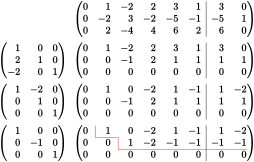

In [29]:
Random.seed!(41283)
A,X,B = gen_gj_pb(3,6,2; maxint=2, pivot_in_first_col=false, num_rhs=2,has_zeros=false)
matrices, pivot_cols = reduce_to_ref( [A B], gj=true )

pivot_locs    = [(i-1,Int64(pivot_cols[i]-1)) for i in eachindex(pivot_cols)]
ref_path_list = [ [length(matrices)-1, 1, pivot_locs, "vh","red"] ]

h,m=nM.ge( to_latex(matrices), Nrhs=size(B,2),
     ref_path_list = ref_path_list, tmp_dir="../../tmp")
h

In [30]:
_,_, desc = reduce_to_ref( [A B], gj=true )
desc

9-element Vector{Any}:
 GenLinAlgProblems.FoundPivot(0, 1, 1, 2, 1, [2])
 GenLinAlgProblems.RequireElimination(0, true, true, 1, 2, 1, [2])
 GenLinAlgProblems.DoElimination(1, 1, 2, true)
 GenLinAlgProblems.FoundPivot(1, 2, 2, 3, 2, [2, 3])
 GenLinAlgProblems.RequireElimination(1, true, true, 2, 3, 2, [2, 3])
 GenLinAlgProblems.DoElimination(2, 2, 3, true)
 GenLinAlgProblems.RequireScaling(2, [2, 3])
 GenLinAlgProblems.DoScaling(3)
 GenLinAlgProblems.Finished(3, [2, 3])

##### GJ problem details

In [31]:
println("Pivot Cols: $pivot_cols" )
RB  = matrices[end][end]
# R = RB[:,1:size(A,2)]; RHS=RB[:,size(A,2)+1:end]
println( "Particular Solution, aka X")
X_p = Int.( particular_solution( RB, size(B,2), pivot_cols) )

Pivot Cols: [2, 3]
Particular Solution, aka X


6×2 Matrix{Int64}:
  0   0
  1  -2
 -1  -1
  0   0
  0   0
  0   0

In [32]:
println("Homogeneous Solution")
X_h = homogeneous_solutions( RB[:,1:size(A,2)], pivot_cols)

Homogeneous Solution
homog solution: Rational{Int64}[1 0 0 0; 0 2 -1 1; 0 2 1 1; 0 1 0 0; 0 0 1 0; 0 0 0 1]


6×4 Matrix{Rational{Int64}}:
 1  0   0  0
 0  2  -1  1
 0  2   1  1
 0  1   0  0
 0  0   1  0
 0  0   0  1

In [33]:
println("Particular Solution")
X

Particular Solution


6×2 Matrix{Int64}:
  0   0
  1  -2
 -1  -1
  0   0
  0   0
  0   0

In [34]:
to_latex(matrices)

4-element Vector{Vector}:
 Any[:none, ["0" "1" … "3" "0"; "0" "-2" … "-5" "1"; "0" "2" … "6" "0"]]
 [["1" "0" "0"; "2" "1" "0"; "-2" "0" "1"], ["0" "1" … "3" "0"; "0" "0" … "1" "1"; "0" "0" … "0" "0"]]
 [["1" "-2" "0"; "0" "1" "0"; "0" "0" "1"], ["0" "1" … "1" "-2"; "0" "0" … "1" "1"; "0" "0" … "0" "0"]]
 [["1" "0" "0"; "0" "-1" "0"; "0" "0" "1"], ["0" "1" … "1" "-2"; "0" "0" … "-1" "-1"; "0" "0" … "0" "0"]]

#### <strong>Inverse Problem</strong>

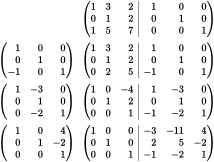

In [35]:
A, A_inv                = gen_inv_pb(3, maxint=3)
matrices, pivot_cols, _ = reduce_to_ref( Rational{Int64}.([A 1I]), gj=true)

h,m=nM.ge( to_latex(matrices), formater=x->x, Nrhs=size(A,1), tmp_dir="../../tmp" )
h

#### **LU problem**

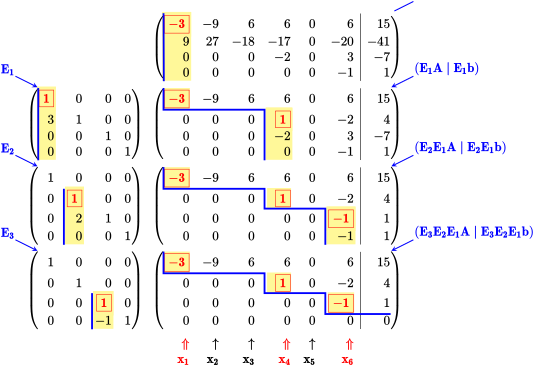

In [36]:
Random.seed!(5003)
m,n,r=4,6,3
pivot_cols, L,U, A = gen_lu_pb(m,n,r, maxint=3)
x,b                       = gen_rhs(A, pivot_cols)

matrices,pivot_cols,desc  = reduce_to_ref( [A b], n=n, gj=false )

pivot_list, bg_for_entries, ref_path_list, basic_var = decorate_ge(desc,pivot_cols,size(A); pivot_color="yellow!40");
#println.(bg_for_entries)

h,m=nM.ge( to_latex(matrices), formater=x->x, Nrhs=1,
           fig_scale        = 1.3,
           pivot_list       = pivot_list, pivot_text_color="red", variable_colors=["red", "black"],
           bg_for_entries   = bg_for_entries,
           ref_path_list    = ref_path_list,
           variable_summary = basic_var,
           array_names=["E", ["A", "b"]],
           tmp_dir="../../tmp", keep_file="../../tmp/bah")
h

#### **$LDL^t$ problem**

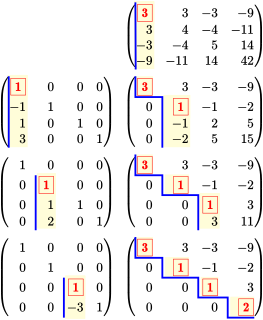

In [37]:
Random.seed!(4105)

L,D,A = gen_ldlt_pb(4)

matrices,_,desc  = reduce_to_ref( A )
pivot_list, bg_for_entries, ref_path_list = decorate_ge(desc,1:size(A,1),size(A))

h,_ = nM.ge(to_latex(matrices), formater=x->x,
            pivot_list     = pivot_list,
            bg_for_entries = bg_for_entries,
            ref_path_list  = ref_path_list,
            fig_scale      = 1.3,
            tmp_dir="../../tmp", keep_file="../../tmp/foo")
h

In [38]:
L = inv( matrices[2][1] )
for i in 3:length(matrices)  L *= inv( matrices[i][1] ) end
D = Diagonal(matrices[end][end])
LDLt = L*D*L'
l_show( L"L D L^t = A : \qquad", Int.(L),Int.(D), Int.(L)', L" = ", Int.(LDLt), inline=true )

L"$L D L^t = A : \qquad \left(\begin{array}{rrrr}
1 & 0 & 0 & 0 \\
1 & 1 & 0 & 0 \\
-1 & -1 & 1 & 0 \\
-3 & -2 & 3 & 1 \\
\end{array}\right) \left(\begin{array}{rrrr}
3 & 0 & 0 & 0 \\
0 & 1 & 0 & 0 \\
0 & 0 & 1 & 0 \\
0 & 0 & 0 & 2 \\
\end{array}\right) \left(\begin{array}{rrrr}
1 & 1 & -1 & -3 \\
0 & 1 & -1 & -2 \\
0 & 0 & 1 & 3 \\
0 & 0 & 0 & 1 \\
\end{array}\right)  =  \left(\begin{array}{rrrr}
3 & 3 & -3 & -9 \\
3 & 4 & -4 & -11 \\
-3 & -4 & 5 & 14 \\
-9 & -11 & 14 & 42 \\
\end{array}\right)$
"

#### **Cholesky Decomposition**

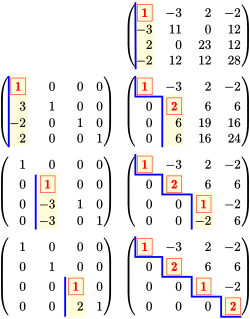

In [39]:
Random.seed!(41325)

L,D,A            = gen_ldlt_pb(4)
matrices,_,desc  = reduce_to_ref( A )

pivot_list, bg_for_entries, ref_path_list = decorate_ge(desc,1:size(A,1),size(A))

h,m = nM.ge(to_latex(matrices), formater=x->x,
            fig_scale      = 1.3,
            pivot_list     = pivot_list,
            bg_for_entries = bg_for_entries,
            ref_path_list  = ref_path_list,
            tmp_dir="../../tmp", keep_file="../../tmp/foo")
h

In [40]:
L = inv( matrices[2][1] )
for i in 3:length(matrices)  L *= inv( matrices[i][1] ) end
D   = Diagonal(matrices[end][end])
G   = sqrt.(Sym.(D))*L'
GtG = G'G

l_show( G, G', L"= ", GtG)

L"$\left(\begin{array}{rrrr}
1 & -3 & 2 & -2 \\
0 & \sqrt{2} & 3 \cdot \sqrt{2} & 3 \cdot \sqrt{2} \\
0 & 0 & 1 & -2 \\
0 & 0 & 0 & \sqrt{2} \\
\end{array}\right) \left(\begin{array}{rrrr}
1 & 0 & 0 & 0 \\
-3 & \sqrt{2} & 0 & 0 \\
2 & 3 \cdot \sqrt{2} & 1 & 0 \\
-2 & 3 \cdot \sqrt{2} & -2 & \sqrt{2} \\
\end{array}\right) =  \left(\begin{array}{rrrr}
1 & -3 & 2 & -2 \\
-3 & 11 & 0 & 12 \\
2 & 0 & 23 & 12 \\
-2 & 12 & 12 & 28 \\
\end{array}\right)$
"

#### **PLU Problem**

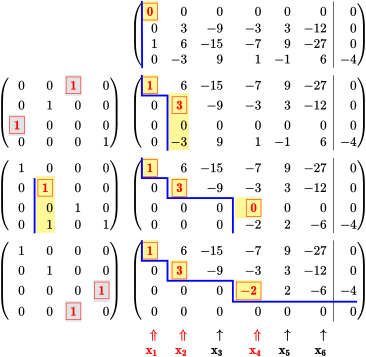

In [41]:
#Random.seed!(4208)
pivot_cols,P,L,U,A        = gen_plu_pb(4,6,3)
x,b                       = gen_rhs(A, pivot_cols)
#print(L_show(b, arraystyle=:curlyarray))

pb = ShowGe{Rational{Int}}( A,  b, tmp_dir="../../tmp")
ref!(pb)
show_layout!(pb, fig_scale=1.3)

#### New Interface

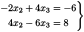

In [42]:
Random.seed!(323);
A,X,B = gen_gj_pb(2,3,2; maxint=2, pivot_in_first_col=false, num_rhs=2,has_zeros=false)
pb = ShowGe{Rational{Int}}( A,  B, tmp_dir="../../tmp")

show_system( pb, b_col=2 )

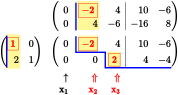

In [43]:
ref!(pb)
show_layout!(pb)

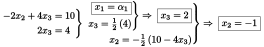

In [44]:
#create_cascade!(pb, b_col=2)
show_backsubstitution!(pb, b_col=1)

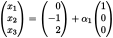

In [45]:
show_solution!(pb, b_col=1)

In [46]:
Xp, Xh = solutions(pb)
l_show( L"B =", pb.B, L"\quad x_p =", Xp, L"\quad x_h = ", Xh)

L"$B = \left(\begin{array}{rr}
10 & -6 \\
-16 & 8 \\
\end{array}\right) \quad x_p = \left(\begin{array}{rr}
0 & 0 \\
-1 & -1 \\
2 & -2 \\
\end{array}\right) \quad x_h =  \left(\begin{array}{r}
1 \\
0 \\
0 \\
\end{array}\right)$
"

In [47]:
#form_linear_combination(symbol_vector(L"\alpha", pb.free_cols), Xh)

##### forward/backward

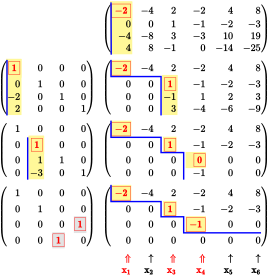

In [3]:
A₁=[-2 -4 2 -2 4 8; 0 0 1 -1 -2 -3; -4 -8 3 -3 10 19; 4 8 -1 0 -14 -25]
pb₁ = ShowGe{Rational{Int}}(A₁)
ref!(pb₁)
show_layout!(pb₁)

In [4]:
P₁      = pb₁.matrices[end][1]
inv_E₁₁ = inv(pb₁.matrices[2][1])
inv_E₁₂ = inv(pb₁.matrices[3][1])
U₁      = pb₁.matrices[end][end]

L₁ = P₁ * inv_E₁₁ * inv_E₁₂ * P₁
l_show("A = ", inv_E₁₁, inv_E₁₂, P₁, U₁ )

L"$\text{A = } \left(\begin{array}{rrrr}
1 & 0 & 0 & 0 \\
0 & 1 & 0 & 0 \\
2 & 0 & 1 & 0 \\
-2 & 0 & 0 & 1 \\
\end{array}\right) \left(\begin{array}{rrrr}
1 & 0 & 0 & 0 \\
0 & 1 & 0 & 0 \\
0 & -1 & 1 & 0 \\
0 & 3 & 0 & 1 \\
\end{array}\right) \left(\begin{array}{rrrr}
1 & 0 & 0 & 0 \\
0 & 1 & 0 & 0 \\
0 & 0 & 0 & 1 \\
0 & 0 & 1 & 0 \\
\end{array}\right) \left(\begin{array}{rrrrrr}
-2 & -4 & 2 & -2 & 4 & 8 \\
0 & 0 & 1 & -1 & -2 & -3 \\
0 & 0 & 0 & -1 & 0 & 0 \\
0 & 0 & 0 & 0 & 0 & 0 \\
\end{array}\right)$
"

In [5]:
b₁ = [4;0;8;-9]
w₁ = P₁' * b₁
l_show( L"P w = b\;\;:\qquad P = ", P₁, L",\;\;b = ", b₁, L"\quad w = ", w₁ )

L"$P w = b\;\;:\qquad P =  \left(\begin{array}{rrrr}
1 & 0 & 0 & 0 \\
0 & 1 & 0 & 0 \\
0 & 0 & 0 & 1 \\
0 & 0 & 1 & 0 \\
\end{array}\right) ,\;\;b =  \left(\begin{array}{r}
4 \\
0 \\
8 \\
-9 \\
\end{array}\right) \quad w =  \left(\begin{array}{r}
4 \\
0 \\
-9 \\
8 \\
\end{array}\right)$
"

L"$\left(\begin{array}{rrrr}
1 & 0 & 0 & 0 \\
0 & 1 & 0 & 0 \\
-2 & 3 & 1 & 0 \\
2 & -1 & 0 & 1 \\
\end{array}\right) \left(\begin{array}{r}
4 \\
0 \\
-9 \\
8 \\
\end{array}\right)$
"

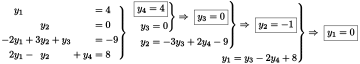

In [15]:
display(l_show( L₁, w₁))
show_forwardsubstitution(L₁,w₁; var_name="y")

In [11]:
typeof(w₁)

Vector{Rational{Int64}} (alias for Array{Rational{Int64}, 1})

# 3. Normal Equation, QR Type Problems

## 3.1 Orthogonal Matrices

In [48]:
Random.seed!(27)

c,mat = W_2_matrix()
l_show( L"\qquad A = ", mat, L", \qquad A^T A = ", mat'mat)

L"$\qquad A =  \left(\begin{array}{rr}
5 & -12 \\
12 & 5 \\
\end{array}\right) , \qquad A^T A =  \left(\begin{array}{rr}
169 & 0 \\
0 & 169 \\
\end{array}\right)$
"

In [49]:
Random.seed!(27)

m=Q_2_matrix()
l_show( L"\qquad A = ", m, L", \qquad A^T A = ", m'm)

L"$\qquad A =  \frac{1}{13} \left(\begin{array}{rr}
5 & -12 \\
12 & 5 \\
\end{array}\right) , \qquad A^T A =  \left(\begin{array}{rr}
1 & 0 \\
0 & 1 \\
\end{array}\right)$
"

In [50]:
Random.seed!(28)
c,m=W_3_matrix()
l_show( L"\qquad A = ", m, L", \qquad A^T A = ", m'm)

L"$\qquad A =  \left(\begin{array}{rrr}
0 & 0 & -2 \\
112 & 15 & 0 \\
15 & -112 & 0 \\
\end{array}\right) , \qquad A^T A =  \left(\begin{array}{rrr}
12769 & 0 & 0 \\
0 & 12769 & 0 \\
0 & 0 & 4 \\
\end{array}\right)$
"

In [51]:
Random.seed!(28)
m = Q_3_matrix()
l_show( L"\qquad A = ", m, L", \qquad A^T A = ", m'm)

L"$\qquad A =  \frac{1}{113} \left(\begin{array}{rrr}
0 & 0 & 113 \\
112 & 15 & 0 \\
15 & -112 & 0 \\
\end{array}\right) , \qquad A^T A =  \left(\begin{array}{rrr}
1 & 0 & 0 \\
0 & 1 & 0 \\
0 & 0 & 1 \\
\end{array}\right)$
"

In [52]:
Random.seed!(28)
m = Q_4_blocks()
l_show( L"\qquad A = ", m, L", \qquad A^T A = ", m'm)

L"$\qquad A =  \frac{1}{2825} \left(\begin{array}{rrrr}
0 & 791 & 2712 & 0 \\
0 & -2712 & 791 & 0 \\
-2800 & 0 & 0 & 375 \\
375 & 0 & 0 & 2800 \\
\end{array}\right) , \qquad A^T A =  \left(\begin{array}{rrrr}
1 & 0 & 0 & 0 \\
0 & 1 & 0 & 0 \\
0 & 0 & 1 & 0 \\
0 & 0 & 0 & 1 \\
\end{array}\right)$
"

In [53]:
Random.seed!(288)
c,m,den = W_4_matrix()
l_show( L"\qquad A = ",1//c,  m, L", \qquad A^T A = ", m'm//(c*c))

L"$\qquad A =  \frac{1}{23} \left(\begin{array}{rrrr}
6 & -13 & 18 & 0 \\
13 & 6 & 0 & 18 \\
0 & -18 & -13 & 6 \\
-18 & 0 & 6 & 13 \\
\end{array}\right) , \qquad A^T A =  \left(\begin{array}{rrrr}
1 & 0 & 0 & 0 \\
0 & 1 & 0 & 0 \\
0 & 0 & 1 & 0 \\
0 & 0 & 0 & 1 \\
\end{array}\right)$
"

In [54]:
Random.seed!(388)
m=Q_4_matrix()

l_show( L"\qquad A = ", m, L", \qquad A^T A = ", m'm)

L"$\qquad A =  \frac{1}{27} \left(\begin{array}{rrrr}
25 & -10 & 0 & 2 \\
2 & 0 & 10 & -25 \\
0 & 2 & 25 & 10 \\
-10 & -25 & 2 & 0 \\
\end{array}\right) , \qquad A^T A =  \left(\begin{array}{rrrr}
1 & 0 & 0 & 0 \\
0 & 1 & 0 & 0 \\
0 & 0 & 1 & 0 \\
0 & 0 & 0 & 1 \\
\end{array}\right)$
"

In [55]:
Random.seed!(388)
m4=Q_matrix(4)
m5=Q_matrix(5)

display( l_show( L"\qquad A_4 = ", m4, L", \qquad\qquad\qquad A_4^T A_4 = ", m4'm4))
display( l_show( L"\qquad A_5 = ", m5, L", \qquad A_5^T A_5 = ", m5'm5))

L"$\qquad A_4 =  \frac{1}{129} \left(\begin{array}{rrrr}
115 & -18 & 44 & 34 \\
34 & 99 & -70 & 28 \\
-44 & 54 & 83 & 70 \\
-18 & -60 & -54 & 99 \\
\end{array}\right) , \qquad\qquad\qquad A_4^T A_4 =  \left(\begin{array}{rrrr}
1 & 0 & 0 & 0 \\
0 & 1 & 0 & 0 \\
0 & 0 & 1 & 0 \\
0 & 0 & 0 & 1 \\
\end{array}\right)$
"

L"$\qquad A_5 =  \frac{1}{203} \left(\begin{array}{rrrrr}
72 & -97 & 20 & 146 & 70 \\
-15 & 164 & -38 & 88 & 70 \\
-54 & 22 & 188 & -8 & 49 \\
180 & 62 & 50 & -41 & -28 \\
22 & -24 & -39 & -102 & 168 \\
\end{array}\right) , \qquad A_5^T A_5 =  \left(\begin{array}{rrrrr}
1 & 0 & 0 & 0 & 0 \\
0 & 1 & 0 & 0 & 0 \\
0 & 0 & 1 & 0 & 0 \\
0 & 0 & 0 & 1 & 0 \\
0 & 0 & 0 & 0 & 1 \\
\end{array}\right)$
"

In [56]:
Random.seed!(388)
m=sparse_Q_matrix((1,1,3))
l_show( L"\qquad A = ", m, L", \qquad A^T A = ", m'm)

L"$\qquad A =  \frac{1}{23} \left(\begin{array}{rrrrr}
0 & 3 & 6 & 22 & 0 \\
0 & 18 & 13 & -6 & 0 \\
-23 & 0 & 0 & 0 & 0 \\
0 & 14 & -18 & 3 & 0 \\
0 & 0 & 0 & 0 & -23 \\
\end{array}\right) , \qquad A^T A =  \left(\begin{array}{rrrrr}
1 & 0 & 0 & 0 & 0 \\
0 & 1 & 0 & 0 & 0 \\
0 & 0 & 1 & 0 & 0 \\
0 & 0 & 0 & 1 & 0 \\
0 & 0 & 0 & 0 & 1 \\
\end{array}\right)$
"

In [57]:
Random.seed!(388)
c,m=sparse_W_matrix((1,1,3))
l_show( L"\qquad A = ", 1//c, m, L", \qquad A^T A = ", m'm//(c*c))

L"$\qquad A =  \frac{1}{23} \left(\begin{array}{rrrrr}
0 & 3 & 6 & 22 & 0 \\
0 & 18 & 13 & -6 & 0 \\
-23 & 0 & 0 & 0 & 0 \\
0 & 14 & -18 & 3 & 0 \\
0 & 0 & 0 & 0 & -23 \\
\end{array}\right) , \qquad A^T A =  \left(\begin{array}{rrrrr}
1 & 0 & 0 & 0 & 0 \\
0 & 1 & 0 & 0 & 0 \\
0 & 0 & 1 & 0 & 0 \\
0 & 0 & 0 & 1 & 0 \\
0 & 0 & 0 & 0 & 1 \\
\end{array}\right)$
"

In [58]:
Random.seed!(388)
m = W_matrix(5)
l_show( L"\qquad A = ", m, L", \qquad A^T A = ", m'm)

L"$\qquad A =  \left(\begin{array}{rrrrr}
16 & -11 & 38 & -18 & -8 \\
9 & 32 & -8 & -16 & -28 \\
8 & 18 & 19 & 38 & -4 \\
-28 & -16 & 4 & 8 & -33 \\
-32 & 22 & 18 & -11 & 16 \\
\end{array}\right) , \qquad A^T A =  \left(\begin{array}{rrrrr}
2209 & 0 & 0 & 0 & 0 \\
0 & 2209 & 0 & 0 & 0 \\
0 & 0 & 2209 & 0 & 0 \\
0 & 0 & 0 & 2209 & 0 \\
0 & 0 & 0 & 0 & 2209 \\
\end{array}\right)$
"

## 3.2 Normal Equation and QR Problems

### 3.2.1 Projection Matrix

In [59]:
A =  gen_full_col_rank_matrix( (1,1,2),3; maxint=2 )
P =  ca_projection_matrix( A )

l_show( L"\qquad A = ", A, L",\qquad P = ", P)

L"$\qquad A =  \frac{1}{5} \left(\begin{array}{rrr}
-5 & -10 & 0 \\
4 & -6 & 6 \\
-5 & 0 & 10 \\
3 & 8 & -8 \\
\end{array}\right) ,\qquad P =  \frac{1}{7} \left(\begin{array}{rrrr}
6 & -1 & -1 & -2 \\
-1 & 6 & -1 & -2 \\
-1 & -1 & 6 & -2 \\
-2 & -2 & -2 & 3 \\
\end{array}\right)$
"

In [60]:
A3 = gen_qr_problem_3(maxint=2)
A4 = gen_qr_problem_4(maxint=2)
B4 = gen_qr_problem(4;maxint=2)
display(l_show( L"\qquad A_3 = ", A3, L", \qquad A_4 = ", A4, L", \qquad B_4 = ", B4  ))
l_show( L"\qquad P_3 = ", ca_projection_matrix(Rational{Int}.( A3 )))

L"$\qquad A_3 =  \left(\begin{array}{rrr}
-24 & -41 & -7 \\
0 & 0 & -1 \\
7 & 38 & -24 \\
\end{array}\right) , \qquad A_4 =  \left(\begin{array}{rrrr}
0 & 4 & 5 & 4 \\
-4 & 8 & 0 & -3 \\
1 & -10 & -10 & 13 \\
8 & -15 & -19 & 7 \\
\end{array}\right) , \qquad B_4 =  \left(\begin{array}{rrrr}
1 & 0 & 0 & -5 \\
-1 & 2 & 2 & -3 \\
-1 & 0 & 2 & 1 \\
1 & -2 & -4 & -1 \\
\end{array}\right)$
"

L"$\qquad P_3 =  \left(\begin{array}{rrr}
1 & 0 & 0 \\
0 & 1 & 0 \\
0 & 0 & 1 \\
\end{array}\right)$
"

### 3.2.2 QR Problems

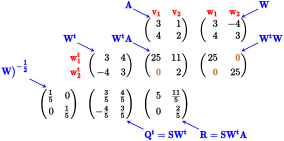

In [61]:
A=[3 1; 4 2]
W   = gram_schmidt_w(A)
h,m = nM.gram_schmidt_qr(A, W, tmp_dir="../../tmp")
h

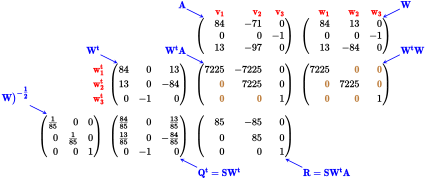

In [62]:
A   = gen_qr_problem_3(maxint=1)
W   = gram_schmidt_w(A)
h,m = nM.gram_schmidt_qr(A, W, tmp_dir="../../tmp")
h

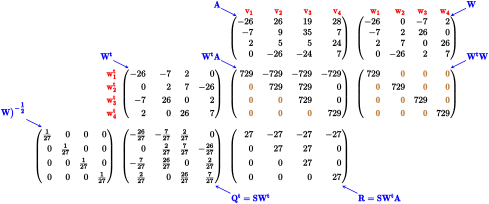

In [63]:
A   = gen_qr_problem_4(maxint=1)
W   = gram_schmidt_w(A)
h,m = nM.gram_schmidt_qr(A, W, tmp_dir="../../tmp", fig_scale=0.9)
h

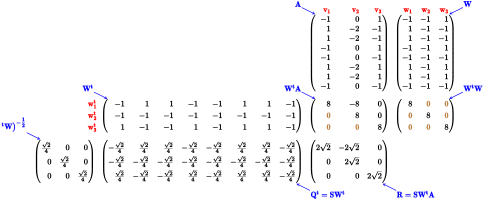

In [64]:
A   = gen_qr_problem(8, maxint=1)
W   = gram_schmidt_w(A[:,1:3])
h,m = nM.gram_schmidt_qr(A[:,1:3], W, fig_scale=0.8, tmp_dir="../../tmp")
h

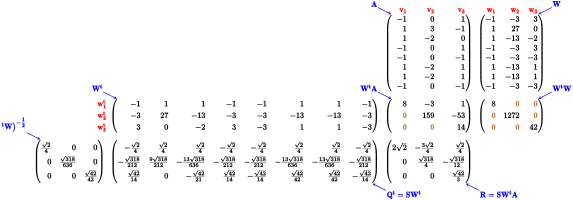

In [65]:
A[2,2]=3; A[3,3]=0; A[5,3]=-1
W   = gram_schmidt_w(A[:,1:3])
h,m = nM.gram_schmidt_qr(A[:,1:3], W, fig_scale=0.8, tmp_dir="../../tmp")
h

# 4. Eigenproblems

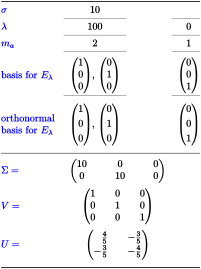

In [66]:
A =[8 -6 0; -6 -8 0]
nM.show_svd_table(A, Ascale=1, mmS=7, mmLambda=10, tmp_dir="../../tmp")

L"$\left(\begin{array}{rrr}
-1 & -1 & 1 \\
4 & 3 & -2 \\
-2 & -1 & 2 \\
\end{array}\right) \text{ = } \left(\begin{array}{rrr}
1 & -1 & 1 \\
-2 & 3 & -2 \\
0 & 1 & 1 \\
\end{array}\right) \left(\begin{array}{rrr}
1 & 0 & 0 \\
0 & 1 & 0 \\
0 & 0 & 2 \\
\end{array}\right) \left(\begin{array}{rrr}
5 & 2 & -1 \\
2 & 1 & 0 \\
-2 & -1 & 1 \\
\end{array}\right)$
"

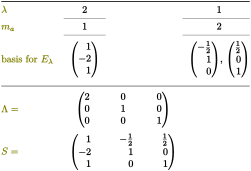

In [67]:
S,Λ,Sinv,A=gen_eigenproblem([1,1,2])
display(l_show( A, " = ", S, Λ, Sinv))
nM.show_eig_tbl(A,fig_scale=1, mmLambda=11, color="Olive", tmp_dir="../../tmp" )

L"$A =  \frac{1}{289} \left(\begin{array}{rrr}
225 & 120 & 0 \\
120 & 64 & 0 \\
0 & 0 & 289 \\
\end{array}\right) ,\quad S =  \frac{1}{17} \left(\begin{array}{rrr}
0 & 15 & 8 \\
0 & 8 & -15 \\
17 & 0 & 0 \\
\end{array}\right) , \quad \Lambda =  \left(\begin{array}{rrr}
1 & 0 & 0 \\
0 & 1 & 0 \\
0 & 0 & 0 \\
\end{array}\right)$
"

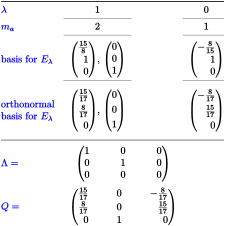

In [68]:
S,Λ,A=gen_symmetric_eigenproblem([1,1,0], maxint=2)
d,A_=factor_out_denominator(A)
#dS,S_=factor_out_denominator(S)
display(l_show(L"A = ", A, L",\quad S = ", S, L", \quad \Lambda = ", Λ))

nM.show_eig_tbl(A_,Ascale=d,normal=true, fig_scale=1, mmLambda=11, color="blue", tmp_dir="../../tmp")

L"$\text{A = } \left(\begin{array}{rrr}
77 & 17 & 8 \\
-153 & -33 & -16 \\
-387 & -87 & -40 \\
\end{array}\right) \text{ rref(A-2I) = } \frac{1}{3} \left(\begin{array}{rrr}
3 & 0 & 1 \\
0 & 3 & -3 \\
0 & 0 & 0 \\
\end{array}\right)$
"

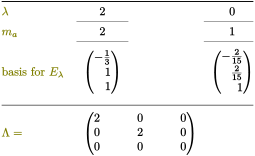

In [69]:
A=Rational{Int64}.(gen_non_diagonalizable_eigenproblem(2,0))
display(l_show("A = ", A, " rref(A-2I) = ", rref(A-2I) ))
nM.show_eig_tbl(Int.(A),fig_scale=1.2, mmLambda=11, color="Olive", tmp_dir="../../tmp" )

L"$\text{A = } \frac{1}{133} \left(\begin{array}{rrrr}
-60 & 302 & -60 & -156 \\
198 & -39 & 198 & 36 \\
36 & 138 & 36 & -66 \\
\end{array}\right) \text{ = } \frac{1}{7} \left(\begin{array}{rrr}
2 & 6 & 3 \\
6 & -3 & 2 \\
3 & 2 & -6 \\
\end{array}\right) \left(\begin{array}{rrrr}
2 & 0 & 0 & 0 \\
0 & 3 & 0 & 0 \\
0 & 0 & 0 & 0 \\
\end{array}\right) \frac{1}{19} \left(\begin{array}{rrrr}
12 & 8 & 12 & -3 \\
-6 & 15 & -6 & -8 \\
-10 & 6 & 9 & 12 \\
9 & 6 & -10 & 12 \\
\end{array}\right)$
"

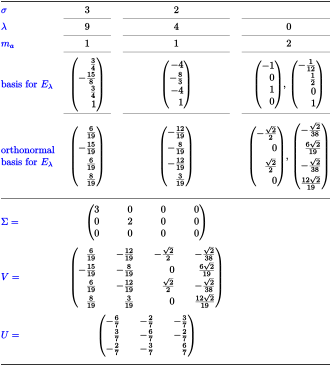

In [23]:
U,Σ,Vt,A = gen_svd_problem(3,4, [2,3],  maxint=2)
dA,intA=factor_out_denominator(A)
dU,intU=factor_out_denominator(U)
dVt,intVt=factor_out_denominator(Vt)

display( l_show( "A = ",A, " = ",U,Σ,Vt))

nM.show_svd_table(intA, Ascale=dA, mmS=7, mmLambda=10, tmp_dir="../../tmp")

# 5. WORK

### GE/GJ

In [58]:
#Random.seed!(284);
M=3; N=5; r=3
A,X,B = gen_gj_pb(M,N,r; maxint=2, pivot_in_first_col=true, num_rhs=M, has_zeros=false)
#A[2,:]=2A[1,:]; B[2,:]=2B[1,:]

pb = ShowGe{Rational{Int}}( A,  Matrix(1I(M)), tmp_dir="../../tmp")
#pb = ShowGe{Rational{Int}}( A,  B[:,1], tmp_dir="../../tmp")

#show_system( pb, b_col=2 )
#println(L_show("A = ", A, L"\quad b = ", B[:,1]))

print(L_show(L"A =", A)) #, L"\quad b = ", B)

$A = \left(\begin{array}{rrrrr}
2 & 0 & 2 & 1 & 0 \\
2 & -2 & 1 & 2 & 4 \\
0 & -2 & -1 & 1 & 2 \\
\end{array}\right)$


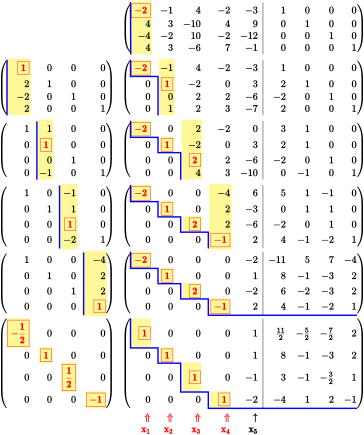

In [48]:
ref!(pb, gj=true)
show_layout!(pb)

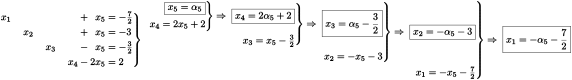

In [49]:
show_backsubstitution!(pb, b_col=3)

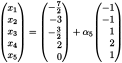

In [50]:
show_solution!(pb, b_col=3)

In [51]:
# we can compute solution matrices rather than a layout
Xp, Xh = solutions(pb)
l_show( L"x_p =", Xp, L"\quad  x_h =", Xh)

L"$x_p = \frac{1}{2} \left(\begin{array}{rrrr}
11 & -5 & -7 & 4 \\
16 & -2 & -6 & 4 \\
6 & -2 & -3 & 2 \\
-8 & 2 & 4 & -2 \\
0 & 0 & 0 & 0 \\
\end{array}\right) \quad  x_h = \left(\begin{array}{r}
-1 \\
-1 \\
1 \\
2 \\
1 \\
\end{array}\right)$
"

In [34]:
#println(l_show(B[:,1]))
#println(l_show(B[:,2]))

#### 6x6 Example

In [ ]:
if true
    M=6;N=6;r=3
    A=[0  0   0   0  0   0
       0  0   0   0  0   0
       0  0   0   0  0   0
       0  0   0   0  1   1
       0  0   0   0  1   2
      -3  3  -9  -6  8  -7]
    A    = Rational{Int}.([A I])
    Nrhs = M
elseif false
    M=3; N=6; r=3
    A=[2 -1 -2  1  0 -2;
       4 -2 -4  2 -2 -3;
      -4  2  4 -2  0  4]
    A    = Rational{Int}.([A I])
    Nrhs = M
else
    M=3; N=6; r=3
    A=[0I(M) zeros(Int,M,N-M)]; A[2,3]=2
    A    = Rational{Int}.([A I])
    Nrhs = M
end

matrices, pivot_cols, desc= reduce_to_ref( A; n=N, gj=true );
pivot_list, bg_for_entries, ref_path_list, variable_summary = decorate_ge(desc, pivot_cols, (M,N));

println("number of layers: $(length(matrices))")
display(latexify((to_latex(matrices[end][end]))))


println( "num_levels = $(length(matrices))")
for k in desc println( k ) end
if false
    println("===================================")
    println("pivot_list")
    for k in pivot_list println(".  $k") end
end
if true
    println("===================================")
    println("bg_list")
    for k in bg_for_entries println(".  $k") end
end
if false
    println("===================================")
    println("ref_path_list")
    for k in ref_path_list println(".  $k") end
end

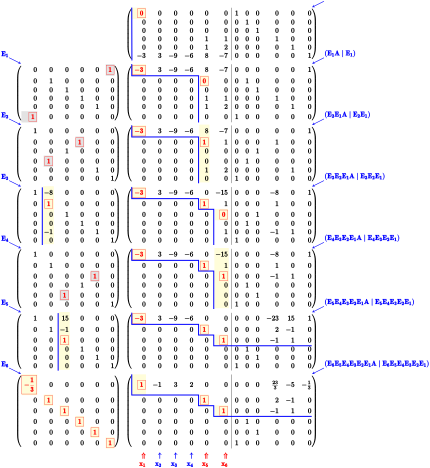

In [78]:
h,m = nM.ge(to_latex(matrices), formater=x->x, Nrhs=Nrhs, tmp_dir="../../tmp",
            pivot_list      = pivot_list,
            ref_path_list   = ref_path_list,
            bg_for_entries  = bg_for_entries,
            array_names     = [ "E", ["A", "I"]],
            variable_summary = variable_summary,
    fig_scale=0.7
)
h

#### Inverse

In [54]:
A, A_inv                = gen_inv_pb(5, maxint=9)
A[3,:]=A[1,:]+3A[2,:]
l_show("A = ", A, L"\quad A^{-1} = ", A_inv)

L"$\text{A = } \left(\begin{array}{rrrrr}
1 & 0 & -9 & 8 & 9 \\
1 & 1 & -17 & 2 & 5 \\
4 & 3 & -60 & 14 & 24 \\
2 & 6 & -62 & -47 & 24 \\
5 & 1 & -57 & 60 & 10 \\
\end{array}\right) \quad A^{-1} =  \left(\begin{array}{rrrrr}
-4126 & 4621 & 517 & -309 & -182 \\
-3705 & 4237 & 464 & -290 & -176 \\
-455 & 516 & 57 & -35 & -21 \\
-32 & 40 & 4 & -3 & -2 \\
32 & -33 & -4 & 2 & 1 \\
\end{array}\right)$
"

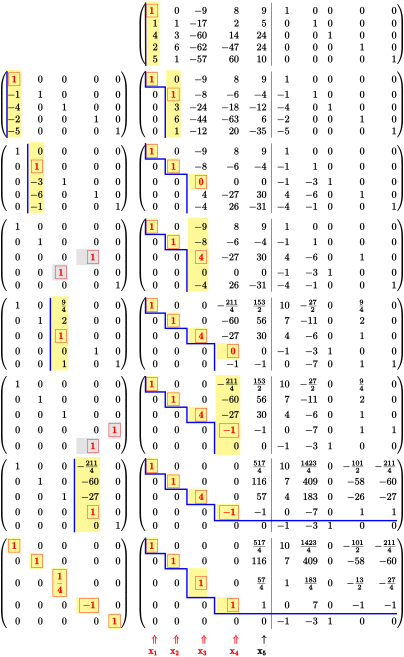

In [55]:
pb = ShowGe{Rational{Int}}( A,  Matrix(1I(size(A,1))), tmp_dir="../../tmp")
ref!(pb, gj=true)
show_layout!(pb)

### QR

In [79]:
Random.seed!(232);
A = gen_qr_problem_4(maxint=1)
A = A[:,1:3]
print(latexify(A[:,1:3]))
l_show("A=",A)

\begin{equation}
\left[
\begin{array}{ccc}
0 & 4 & -8 \\
-7 & 4 & 7 \\
4 & 7 & -11 \\
4 & 0 & 3 \\
\end{array}
\right]
\end{equation}


L"$\text{A=} \left(\begin{array}{rrr}
0 & 4 & -8 \\
-7 & 4 & 7 \\
4 & 7 & -11 \\
4 & 0 & 3 \\
\end{array}\right)$
"

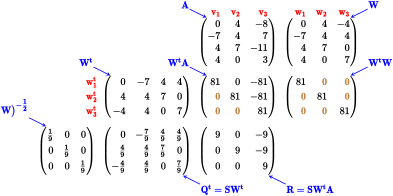

In [80]:
W   = gram_schmidt_w(A)
h,m = nM.gram_schmidt_qr(A, W, fig_scale=1, tmp_dir="../../tmp")
h

In [81]:
#print(latexify(A[:,1:3]))
B = Rational{Int}.(A)
Q = W//9
R = W'B//9

3×3 Matrix{Rational{Int64}}:
 9  0  -9
 0  9  -9
 0  0   9

In [82]:
l_show( "trace", L" (Q Q^t) =", tr(Q*Q'))

L"$\text{trace}  (Q Q^t) = 3$
"

### Eigenproblems

#### General Case

In [13]:
S,Λ,Sinv,A = gen_eigenproblem([2,-1,-1])
d,intA     = factor_out_denominator(A)

l_show( L"A = ", A, L"\quad p(\lambda) = %$(charpoly(A))" )

L"$A =  \left(\begin{array}{rrr}
44 & 3 & -12 \\
-90 & -7 & 24 \\
135 & 9 & -37 \\
\end{array}\right) \quad p(\lambda) = -λ^3 + 3*λ + 2$
"

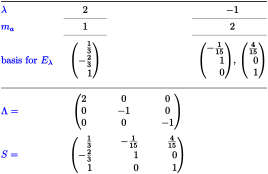

In [15]:
nM.show_eig_tbl(A,fig_scale=1, mmLambda=11, color="blue", tmp_dir="../../tmp" )

#### Complex Case

In [9]:
S,Λ,S_inv, A = gen_cx_eigenproblem( [-1+2im])
d,intA       = factor_out_denominator(A)

l_show( L"A = ", A, L"\quad p(\lambda) = %$(charpoly(A))" )

L"$A =  \left(\begin{array}{rr}
1 & -4 \\
2 & -3 \\
\end{array}\right) \quad p(\lambda) = λ^2 + 2*λ + 5$
"

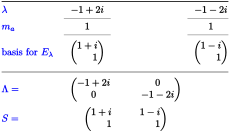

In [10]:
nM.show_eig_tbl(intA,Ascale=d, fig_scale=1, mmLambda=11, color="blue", tmp_dir="../../tmp" )

#### Symmetric Case

In [39]:
#_,A = gen_gj_matrix(3,3,3)
W = gram_schmidt_w(A)//1
B=W*Diagonal([2,1,1])*inv(W)
l_show( L"A = ", A, L"\quad p(\lambda) = %$(charpoly(A)),\qquad B=", 6B )
print(L_show(B))

$\frac{1}{6} \left(\begin{array}{rrr}
7 & 1 & 2 \\
1 & 7 & 2 \\
2 & 2 & 10 \\
\end{array}\right)$


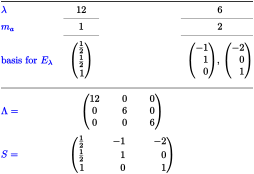

In [38]:
nM.show_eig_tbl(Int.(6B),Ascale=1, fig_scale=1, tmp_dir="../../tmp" )

In [17]:
#Random.seed!(243);
S,Λ,A   = gen_symmetric_eigenproblem([2,-1,-1], maxint=2)
l_show( L"A = ", A, L"\quad p(\lambda) = %$(charpoly(A))" )

L"$A =  \frac{1}{1369} \left(\begin{array}{rrr}
-1369 & 0 & 0 \\
0 & 2306 & -1260 \\
0 & -1260 & -937 \\
\end{array}\right) \quad p(\lambda) = -λ^3 + 3*λ + 2$
"

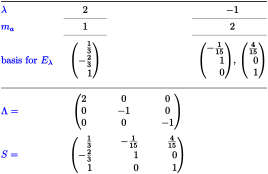

In [19]:
nM.show_eig_tbl(intA,Ascale=d, fig_scale=1, mmLambda=11, color="blue", tmp_dir="../../tmp" )

#### Non-diagonalizable Matrix

In [11]:
A       = gen_non_diagonalizable_eigenproblem(2,0)
d,intA  = factor_out_denominator(A)

l_show( L"A = ", A, L"\quad p(\lambda) = %$(charpoly(A))" )

L"$A =  \left(\begin{array}{rrr}
11 & 1 & 9 \\
6 & 2 & 6 \\
-11 & -1 & -9 \\
\end{array}\right) \quad p(\lambda) = -λ^3 + 4*λ^2 - 4*λ$
"

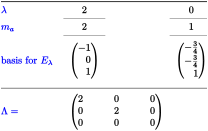

In [12]:
nM.show_eig_tbl(intA,Ascale=d, fig_scale=1, mmLambda=11, color="blue", tmp_dir="../../tmp" )

#### Orthonormal Decomposition

In [39]:
#Random.seed!(2883);
S,Λ,A   = gen_symmetric_eigenproblem([2,0,3], maxint=2)
d,intA  = factor_out_denominator(A)

l_show( L"A = ", A, L"\quad p(\lambda) = %$(charpoly(A))" )

L"$A =  \frac{1}{25} \left(\begin{array}{rrr}
32 & -24 & 0 \\
-24 & 18 & 0 \\
0 & 0 & 75 \\
\end{array}\right) \quad p(\lambda) = -λ^3 + 5*λ^2 - 6*λ$
"

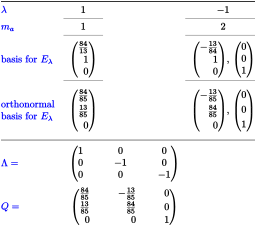

In [92]:
nM.show_eig_tbl(intA,Ascale=d,normal=true, fig_scale=1, mmLambda=11, color="blue", tmp_dir="../../tmp" )

#### SVD

In [93]:
Random.seed!(273);
U,Σ,Vt,A = gen_svd_problem(3,[3,2],  [2,2],  maxint=2)
dA,intA=factor_out_denominator(A)
dU,intU=factor_out_denominator(U)
dVt,intVt=factor_out_denominator(Vt)

l_show("A =", A, " = ", U, Σ, Vt)

L"$\text{A =} \frac{1}{175} \left(\begin{array}{rrrrr}
-120 & 80 & 168 & 240 & 126 \\
0 & 0 & 0 & 0 & 0 \\
90 & -60 & 224 & -180 & 168 \\
\end{array}\right) \text{ = } \frac{1}{5} \left(\begin{array}{rrr}
3 & -4 & 0 \\
0 & 0 & 5 \\
4 & 3 & 0 \\
\end{array}\right) \left(\begin{array}{rrrrr}
2 & 0 & 0 & 0 & 0 \\
0 & 2 & 0 & 0 & 0 \\
0 & 0 & 0 & 0 & 0 \\
\end{array}\right) \frac{1}{35} \left(\begin{array}{rrrrr}
0 & 0 & 28 & 0 & 21 \\
15 & -10 & 0 & -30 & 0 \\
10 & -30 & 0 & 15 & 0 \\
0 & 0 & 21 & 0 & -28 \\
-30 & -15 & 0 & -10 & 0 \\
\end{array}\right)$
"

In [ ]:
nM.show_svd_table(A, Ascale=1, mmS=7, mmLambda=10, tmp_dir="../../tmp")

In [7]:
#A,X,B = gen_gj_pb(3,2,2; maxint=2, pivot_in_first_col=false, num_rhs=1,has_zeros=false)
println(L_show( "A = ", A, L", \qquad b=", B+[1;0;-1]))

$\text{A = } \left(\begin{array}{rr}
1 & -1 \\
-1 & 2 \\
-2 & 0 \\
\end{array}\right) , \qquad b= \left(\begin{array}{r}
1 \\
2 \\
-5 \\
\end{array}\right)$



In [8]:
l_show( "A = ", A, L", \qquad b=", B+[1;0;-1])

L"$\text{A = } \left(\begin{array}{rr}
1 & -1 \\
-1 & 2 \\
-2 & 0 \\
\end{array}\right) , \qquad b= \left(\begin{array}{r}
1 \\
2 \\
-5 \\
\end{array}\right)$
"

In [10]:
rref([A'A A'B])

2×3 Matrix{Float64}:
 1.0  0.0  2.0
 0.0  1.0  2.0

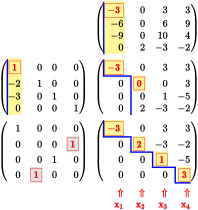

In [6]:
M=4; N=4; r=4
pivot_cols,P,L,U,A        = gen_plu_pb(M,N,r; has_zeros=true)

pb = ShowGe{Rational{Int}}( A, tmp_dir="../../tmp")
ref!(pb)
#show_system( pb, b_col=2 )
show_layout!(pb)

In [14]:
U,Σ,Vt,A = gen_svd_problem(2,2,  [1,2],  maxint=2)

l_show("A =", A, " = ", U, Σ, Vt)

L"$\text{A =} \frac{1}{5} \left(\begin{array}{rr}
6 & -8 \\
-4 & -3 \\
\end{array}\right) \text{ = } \left(\begin{array}{rr}
0 & 1 \\
-1 & 0 \\
\end{array}\right) \left(\begin{array}{rr}
1 & 0 \\
0 & 2 \\
\end{array}\right) \frac{1}{5} \left(\begin{array}{rr}
4 & 3 \\
3 & -4 \\
\end{array}\right)$
"

In [17]:
U,Σ,Vt,A = gen_svd_problem(2,3,  [1,2],  maxint=2)

l_show("A =", A, " = ", U, Σ, Vt)

L"$\text{A =} \frac{1}{5} \left(\begin{array}{rrr}
8 & 6 & 0 \\
0 & 0 & -5 \\
\end{array}\right) \text{ = } \left(\begin{array}{rr}
0 & 1 \\
-1 & 0 \\
\end{array}\right) \left(\begin{array}{rrr}
1 & 0 & 0 \\
0 & 2 & 0 \\
\end{array}\right) \frac{1}{5} \left(\begin{array}{rrr}
0 & 0 & 5 \\
4 & 3 & 0 \\
3 & -4 & 0 \\
\end{array}\right)$
"

In [19]:
l_show(A'A)

L"$\frac{1}{25} \left(\begin{array}{rrr}
64 & 48 & 0 \\
48 & 36 & 0 \\
0 & 0 & 25 \\
\end{array}\right)$
"

L"$p(\lambda) = -λ^3 + 5*λ^2 - 7*λ + 3$
"

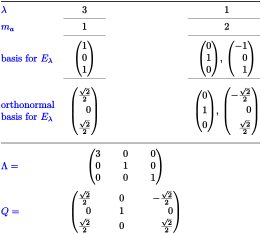

In [6]:
A=[2 0 1; 0 1 0; 1 0 2]
display(l_show( L"p(\lambda) = %$(charpoly(A))" ))
nM.show_eig_tbl(A,Ascale=1,normal=true, fig_scale=1, tmp_dir="../../tmp" )

key:
* eigvals  (3,1,1)        3
* eigvec                  1, 2
* orthog                  2
* statement A=,Λ Q        2